# ABA: HW2 Solutions

### Spring 2024

In [1]:
# Import required libraries :
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats 
import statsmodels.formula.api as smf
from patsy import dmatrices

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Question 1

1. SmartAttire, is an established clothing catalog company with an online presence at SmartAttire.com. In order to gain an understanding of the aggregate visiting patterns of broader Internet users, the firm purchased Media Metrix panel data. For a sample of 2728 people who visited any online apparel site at least once during the second half of 2017, the dataset reports how many visits each person made to the SmartAttire.com web site, along with some demographic information. Management would like to know whether the frequency of visits to the web site is related to demographic characteristics.

Since you are an expert, the manager comes to you to help you understand the role of demographic variables in website visits. 


### [i] First aggregate the data at total visit level and count the number of customers. Then plot a bar chart. Comment on what the distribution looks like. [5]

#### Data Cleaning

In [2]:
df = pd.read_excel('hw2_S24_data.xlsx',sheet_name='smart_attire', header=0)
df.head(10)

,ID,Total Visits,Income,Sex,Age,Size
0,1,0,11.379394,1,3.871201,2
1,2,5,9.769956,1,4.043051,1
2,3,0,11.082143,0,3.332205,2
3,4,0,10.915088,1,3.951244,3
4,5,0,10.915088,1,2.833213,3
5,6,0,10.915088,0,2.944439,3
6,7,0,11.191342,0,3.663562,2
7,8,1,11.736069,0,4.077537,2
8,9,0,10.021271,0,4.248495,1
9,10,0,10.915088,0,3.850148,3


In [3]:
df.rename(columns={'Total Visits': 'Visits'},inplace=True)

In [4]:
#groupby visits and count
df

,ID,Visits,Income,Sex,Age,Size
0,1,0,11.379394,1,3.871201,2
1,2,5,9.769956,1,4.043051,1
2,3,0,11.082143,0,3.332205,2
3,4,0,10.915088,1,3.951244,3
4,5,0,10.915088,1,2.833213,3
...,...,...,...,...,...,...
2723,2724,0,9.528794,1,2.944439,2
2724,2725,0,11.379394,0,3.970292,2
2725,2726,0,11.191342,1,3.044522,3
2726,2727,0,10.532096,1,2.890372,4


#### Plot

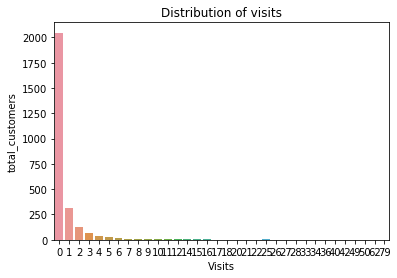

In [5]:
#group by and plot
df_summary = df.groupby('Visits').size().to_frame("total_customers").reset_index()
sns.barplot(data=df_summary,x='Visits',y='total_customers')
plt.title("Distribution of visits")
plt.show()

### [ii] Write down a Poisson model that estimates the impact of covariates ((income, sex, age, and size) on number of visits. Show the equation, estimate GLM model, show the output and interpret the estimates.

We will estimate the following model, the log of the mean as a function of the linear combination of the covariates:

\begin{equation}
\log(\lambda) = \beta_0 + \beta_1 \times \text{income} + \beta_2 \times \text{sex} + \beta_3 \times \text{age} + \beta_4 \times \text{size}
\end{equation}


### Poisson regression

In [6]:
expr = 'Visits ~ Income + Sex+ Age + Size'

In [7]:
#create test and train set

np.random.seed(42) #set random seed so we can recreate the results
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=2182
Testing data set length=546


In [8]:
df_train

,ID,Visits,Income,Sex,Age,Size
0,1,0,11.379394,1,3.871201,2
2,3,0,11.082143,0,3.332205,2
3,4,0,10.915088,1,3.951244,3
4,5,0,10.915088,1,2.833213,3
5,6,0,10.915088,0,2.944439,3
...,...,...,...,...,...,...
2723,2724,0,9.528794,1,2.944439,2
2724,2725,0,11.379394,0,3.970292,2
2725,2726,0,11.191342,1,3.044522,3
2726,2727,0,10.532096,1,2.890372,4


In [9]:
#create d matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [10]:
Poisson_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [11]:
print(Poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Visits   No. Observations:                 2182
Model:                            GLM   Df Residuals:                     2177
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5426.2
Date:                Sun, 25 Feb 2024   Deviance:                       9376.1
Time:                        12:30:25   Pearson chi2:                 3.60e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2845      0.441     -7.448      0.0

1. **Intercept**:
   
   $\exp(-3.2845)= 0.0378$

   This represents the base count when all predictors are zero.

2. **Income**:

   $\exp(0.0899)= 1.094$

   This means that for every one-unit increase in income, the expected number of visits is multiplied by 1.094 (or an increase of about 9.4%) while keeping all other variables constant. **statistically significant.**

3. **Sex**:

   $\exp(-0.0215)= 0.9786$

   Sex=1 multiplies the expected number of visits by 0.9786 (or a decrease of about 2.14%). **Not statistically significant.**

4. **Age**:

   $\exp(0.6355) = 1.8882$

   For each year increase in age, the expected number of visits multiplies by 1.8882, implying a significant increase in expected visits as age increases. **statistically significant.**

5. **Size**:

   $\exp(0.0014)= 1.0014$

   For a one-unit increase in size, the expected number of visits is multiplied by 1.0014 (or a minimal increase of about 0.14%). **Not statistically significant.**

These multiplicative factors help us understand the relative change in the expected count of the response variable due to a one-unit change in each predictor.


### Individual Predictions

***You don't have to compute this for this homework.***

The predict function gives us the following estimation of lambda for each individual. That is, the E(Y), or the expected visit counts for each individual.

\begin{equation}
\hat{\lambda} = \exp\left(\hat{\beta}_0 + \hat{\beta}_1 \times \text{income} + \hat{\beta}_2 \times \text{sex} + \hat{\beta}_3 \times \text{age} + \hat{\beta}_4 \times \text{size}\right)
\end{equation}


In [12]:
## prediction 
Poisson_predictions = Poisson_results.predict(X_test)
Poisson_predictions 

1       1.154227
7       1.440642
11      1.264874
12      0.977470
33      0.721221
          ...   
2701    1.392251
2705    0.751396
2717    0.924969
2718    0.573802
2720    1.297214
Length: 546, dtype: float64

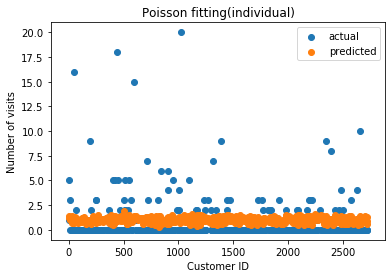

In [13]:
## We can compare them a the individual level
plt.scatter(y_test.index, y_test, label="actual")
plt.scatter(y_test.index, Poisson_predictions, label="predicted")
plt.title("Poisson fitting(individual)")
plt.xlabel("Customer ID")
plt.ylabel("Number of visits")
plt.legend()
plt.show()

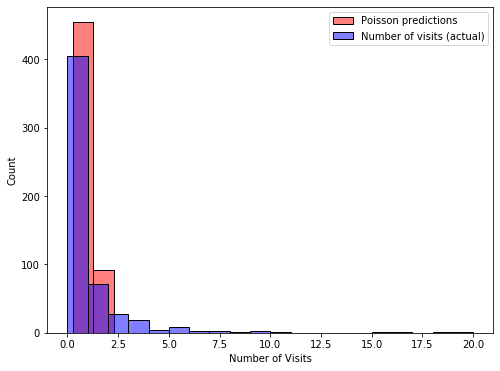

In [14]:
# Set up the Matplotlib figure
plt.figure(figsize=(8, 6))
# Plot the 'poisson_predictions' histogram
sns.histplot(x=Poisson_predictions, color='red',  label='Poisson predictions',binwidth =1, alpha=0.5)
# Plot the 'actual' histogram
sns.histplot(x=y_test.Visits, color='blue', label='Number of visits (actual)',binwidth=1, alpha=0.5)

plt.xlabel("Number of Visits")
plt.ylabel("Count")
plt.legend()
plt.show()

### [iii] You believe that income will go up by 10 percent in the coming year.  How will it change the number of visits? We aggregated the data at visit level in part (i). Calculate the updated number of visits and plot the bar chart. [15]

 In this quiz, you were asked to follow the steps to make predictions about the counts:
1. Increase the income by 10% for individuals in the test set.
2. Estimate $\hat{\lambda_i}$  using the predict function for each individual in the test set.
3. Plot the distribution of the predicted $\hat{\lambda_i}$


1. Increase by 10 percent on the test set

In [15]:
#copy test set
X_test_10 = X_test.copy()

In [16]:
#increase by 10 percent
X_test_10['Income'] = X_test_10['Income']*1.1

2. estimate lambda



In [17]:
Poisson_predictions_income10 = Poisson_results.predict(X_test_10)

In [18]:
Poisson_predictions_income10

1       1.260243
7       1.601030
11      1.395351
12      1.074592
33      0.782572
          ...   
2701    1.553805
2705    0.832375
2717    1.020383
2718    0.632993
2720    1.431027
Length: 546, dtype: float64

3. Plot the distribution of the predicted $\hat{\lambda_i}$

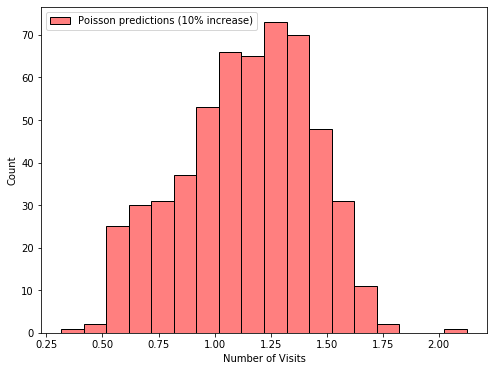

In [19]:
# Set up the Matplotlib figure
plt.figure(figsize=(8, 6))
# Plot the 'poisson_predictions' histogram
sns.histplot(x=Poisson_predictions_income10, color='red',  label='Poisson predictions (10% increase)', alpha=0.5)
#compare with previous predictions (no 10% increase in income)
#sns.histplot(x=Poisson_predictions, color='blue',  label='Poisson predictions', alpha=0.5)
plt.xlabel("Number of Visits")
plt.ylabel("Count")
plt.legend()
plt.show()

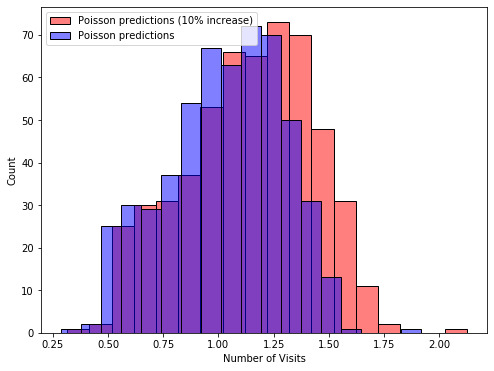

In [20]:
# We can compare it to the predictions for the test set without the 10% increase

# Set up the Matplotlib figure
plt.figure(figsize=(8, 6))
# Plot the 'poisson_predictions' histogram
sns.histplot(x=Poisson_predictions_income10, color='red',  label='Poisson predictions (10% increase)', alpha=0.5)
#compare with previous predictions (no 10% increase in income)
sns.histplot(x=Poisson_predictions, color='blue',  label='Poisson predictions', alpha=0.5)
plt.xlabel("Number of Visits")
plt.ylabel("Count")
plt.legend()
plt.show()

We note that an increase in income by 10 percent increases the expected number of visits, as expected given the positive significant coefficient in income in our model.

# Question 2

#### 2.	I am attaching a call center dataset on the number of calls of a call center from people with different income and gender. You see lots of zeros and believe that even though number of calls may follow Poisson model, this is a zero inflated Poisson model (ZIP). 

#### Explain the mechanism behind zero inflated model. What modification to the Poisson model should be made? Explain clearly. [5]

The zero inflated model allows us to model data that has too many zero counts. To accommodate excessive zeros, we have to incorporate a structure which can predict probability of zero incidence. Thus, a Zero inflated Poisson model has two parts:

- A PMF P(y_i=0) which is used to calculate the probability of observing a zero count.
- A second PMF P(y_i=k) which is used to calculate the probability of observing k events, given that k > 0.

We can express it as:

$${\displaystyle \Pr(Y=0)=\pi +(1-\pi )e^{-\lambda }}$$

$${\displaystyle \Pr(Y=y_{i})=(1-\pi ){\frac {\lambda ^{y_{i}}e^{-\lambda }}{y_{i}!}},\qquad y_{i}=1,2,3,...}$$

where the outcome variable 
$y_{i}$ has any non-negative integer value, $\lambda$  is the expected Poisson count for the  ith individual; $\pi_i$  is the probability of extra zeros. Probability $\pi_i$ can be written as a logistics distribution such that:

$$\pi={\frac{e^{X\beta}}{1 + e^{X\beta}}}$$


Ref: see https://en.wikipedia.org/wiki/Zero-inflated_model#Discrete_pseudo_compound_Poisson_model

#### Estimate the model

In [21]:
#read data
df_q2 = pd.read_excel('hw2_S24_data.xlsx',sheet_name='call_center')
cols_to_keep = ['Member id', 'No of Calls','Gender (F=1/M=0)','income']
df_q2 = df_q2[cols_to_keep].reset_index(drop=True)

#compute log of income
df_q2['log_income'] = np.log(df_q2.income)
df_q2.rename(columns={'No of Calls':'num_calls','Gender (F=1/M=0)':'gender'},inplace=True)
df_q2

,Member id,num_calls,gender,income,log_income
0,1,0,0,305335,12.629165
1,7,0,0,175512,12.075463
2,8,0,1,275580,12.526633
3,11,0,1,96302,11.475244
4,13,0,1,229042,12.341661
...,...,...,...,...,...
59275,30241,39,0,377605,12.841604
59276,1340,41,0,467444,13.055035
59277,41050,41,0,408869,12.921150
59278,30532,56,0,220004,12.301401


In [22]:
#Create the training and test data sets. 
np.random.seed(0)
mask = np.random.rand(len(df_q2)) < 0.8
df_train = df_q2[mask]
df_test = df_q2[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=47512
Testing data set length=11768


##### (i)	first (model 1), use log of income as a covariate for zero inflation part and the other two as covariates for Poisson model [2.5]

In [23]:
#for second part of the model (Poisson)
expr = 'num_calls ~ gender + log_income'
y_train1, X_train_poisson1 = dmatrices(expr, df_train, return_type='dataframe')
y_test1, X_test_poisson1 = dmatrices(expr, df_test, return_type='dataframe')

#for  Logit
expr = 'num_calls ~ log_income'
_, X_train_logit1 = dmatrices(expr, df_train, return_type='dataframe')
_, X_test_logit1 = dmatrices(expr, df_test, return_type='dataframe')

We want to now fit Zero Inflated model which is a combination of Logit and Poisson

In [24]:
# The ZeroInflatedPoisson model class will internally use a LogisticRegression model to 
#estimate the parameter ϕ. Hence we set the model parameter inflation to ’logit’
zip_training_results1 = sm.ZeroInflatedPoisson(endog=y_train1
                                               , exog=X_train_poisson1
                                               , exog_infl=X_train_logit1
                                               , inflation='logit').fit(maxiter=100)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 1.642125
         Iterations: 31
         Function evaluations: 35
         Gradient evaluations: 35


In [25]:
print(zip_training_results1.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               num_calls   No. Observations:                47512
Model:             ZeroInflatedPoisson   Df Residuals:                    47509
Method:                            MLE   Df Model:                            2
Date:                 Sun, 25 Feb 2024   Pseudo R-squ.:               1.999e-05
Time:                         12:30:34   Log-Likelihood:                -78021.
converged:                        True   LL-Null:                       -78022.
Covariance Type:             nonrobust   LLR p-value:                    0.2102
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inflate_Intercept      0.1531      0.148      1.034      0.301      -0.137       0.443
inflate_log_income    -0.0090      0.012     -0.747      0.455      -0.033       0.015
Intercept   

##### (ii)	and second (model 2), use Gender as covariate for zero inflation part and the other two for Poisson model [2.5]

In [26]:
#for second part of the model (Poisson)
expr = 'num_calls ~ gender + log_income'
y_train2, X_train_poisson2 = dmatrices(expr, df_train, return_type='dataframe')
y_test2, X_test_poisson2 = dmatrices(expr, df_test, return_type='dataframe')

#for logit
expr = 'num_calls ~ gender'
_,X_train_logit2 = dmatrices(expr, df_train, return_type='dataframe')
_,X_test_logit2 = dmatrices(expr, df_test, return_type='dataframe')

We want to now fit Zero Inflated model which is a combination of Logit and Poisson

In [27]:
#The ZeroInflatedPoisson model class will internally use a LogisticRegression model to 
#estimate the parameter ϕ. Hence we set the model parameter inflation to ’logit’
zip_training_results2 = sm.ZeroInflatedPoisson(endog=y_train2
                                               , exog=X_train_poisson2
                                               , exog_infl=X_train_logit2
                                               , inflation='logit').fit(maxiter=100)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 1.642127
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29


In [28]:
print(zip_training_results2.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               num_calls   No. Observations:                47512
Model:             ZeroInflatedPoisson   Df Residuals:                    47509
Method:                            MLE   Df Model:                            2
Date:                 Sun, 25 Feb 2024   Pseudo R-squ.:               1.880e-05
Time:                         12:30:37   Log-Likelihood:                -78021.
converged:                        True   LL-Null:                       -78022.
Covariance Type:             nonrobust   LLR p-value:                    0.2307
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_Intercept     0.0368      0.014      2.614      0.009       0.009       0.064
inflate_gender        0.0120      0.020      0.602      0.547      -0.027       0.051
Intercept       

### Can you explain what the economic meaning of these covariates is? 

We observe that, for the case of model (i), the coefficent in log income for the logit part is not significant, meaning, we don't find evidence that it has a relation with the probability of having a call. Neither the gender nor the log of income, for the poisson part, have a significant impact in the number of calls.

It is similar for the case of model (i), where none of the covariates for either the logit or Poisson seem to influence the probability and the mean expected counts respectively.

The covariate gender or age in our model do not seem to affect the probability of having a call. Intercept is significant only on second model.

### Plot the actual and predicted values, and the show the deviance. Which model (model 1 or 2) seems like a better fit? [5]

Using Means

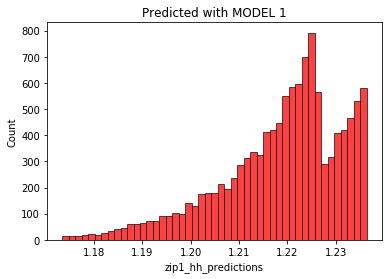

Total number of predicted calls (Model 1):  14341.585375283634
Total number of actual calls:  14190.0


In [29]:
#ZIP PREDICTIONS FOR MODEL 1
y_test1['zip1_hh_predictions'] = zip_training_results1.predict(exog=X_test_poisson1,exog_infl=X_test_logit1)

#ZIP PLOT FOR MODEL 1
plt.title("Predicted with MODEL 1")
sns.histplot(data=y_test1,x='zip1_hh_predictions',color='red')
plt.show()
print("Total number of predicted calls (Model 1): ", y_test1.zip1_hh_predictions.sum())
print("Total number of actual calls: ", y_test1.num_calls.sum())

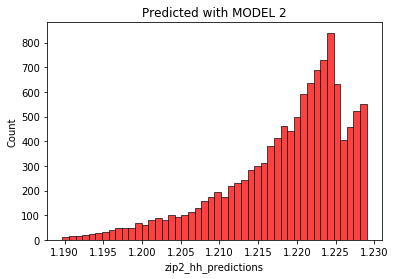

Total number of predicted calls (Model 2):  14340.912416192854
Total number of actual calls:  14190.0


In [30]:
#ZIP PREDICTIONS FOR MODEL 2
y_test2['zip2_hh_predictions'] = zip_training_results2.predict(exog=X_test_poisson2,exog_infl=X_test_logit2)

#ZIP PLOT FOR MODEL 2
plt.title("Predicted with MODEL 2")
#plt.hist(y_test2.num_calls, 40,color='blue',rwidth=0.3)
sns.histplot(data=y_test2,x='zip2_hh_predictions',color='red')
plt.show()
print("Total number of predicted calls (Model 2): ", y_test2.zip2_hh_predictions.sum())
print("Total number of actual calls: ", y_test2.num_calls.sum())

As before, since the covariates do not explain the variation much for both models, both the average predictions gravitate towards mean which is about 1.2. We can also see this in similar values for likelihood function. Hence individual predictions are poor. Unless we aggegate the data (number of 0, 1, 2 and so on) and do PMF with the distrbution that we define for zero inflated, we will not see a good fit.
